<a href="https://colab.research.google.com/github/vanshg27/Flower_Species_ML/blob/main/Using_flower_metrics_to_predict_flower_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *ML Model*

###**Import Libraries**

In [ ]:
import pandas as pd


###**Load Data**


In [5]:


df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/iris.csv')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##Data Preparation
###Spilitting X and Y

In [6]:
y = df['Species']
y

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [15]:
x = df.drop('Species' , axis=1)
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##Data Splitting for training and testing

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)
x_test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
128,6.4,2.8,5.6,2.1
11,4.8,3.4,1.6,0.2
118,7.7,2.6,6.9,2.3
15,5.7,4.4,1.5,0.4
123,6.3,2.7,4.9,1.8
135,7.7,3.0,6.1,2.3
32,5.2,4.1,1.5,0.1
1,4.9,3.0,1.4,0.2
116,6.5,3.0,5.5,1.8
45,4.8,3.0,1.4,0.3


##Model Building

###Linear Regression
####Training the model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Convert the target variable from string to numerical labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and train the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train, y_train_encoded)

LogisticRegression()

###Applying the model

In [26]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
y_lr_train_pred

array([1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 0])

In [27]:
y_lr_test_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2])

##Evaluate Model Performance

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc_score_train = accuracy_score(y_train_encoded,y_lr_train_pred)
confusion_matrix_train=confusion_matrix(y_train_encoded,y_lr_train_pred)
classification_report_train=classification_report(y_train_encoded,y_lr_train_pred)

acc_score_test = accuracy_score(y_test_encoded,y_lr_test_pred)
confusion_matrix_test=confusion_matrix(y_test_encoded,y_lr_test_pred)
classification_report_test=classification_report(y_test_encoded,y_lr_test_pred)
print(acc_score_train,confusion_matrix_train,classification_report_train)
print(acc_score_test,confusion_matrix_test,classification_report_test)

0.975 [[39  0  0]
 [ 0 42  2]
 [ 0  1 36]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      0.95      0.97        44
           2       0.95      0.97      0.96        37

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.98       120
weighted avg       0.98      0.97      0.98       120

0.9666666666666667 [[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [32]:
lr_results = pd.DataFrame(['Logistic Regression',acc_score_train,acc_score_test]).transpose()
lr_results.columns = ['Models','Training Accuracy','Testing Accuracy']
lr_results


,Models,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.975,0.966667


#Random Forest

##Training the model

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train_encoded)

RandomForestClassifier(n_estimators=10)

##Applying the model

In [34]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
y_rf_train_pred

array([1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 0])

##Evaluate Model Performance

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rf_test_acc = accuracy_score(y_test_encoded,y_rf_test_pred)
rf_train_acc = accuracy_score(y_train_encoded,y_rf_train_pred)
rf_results = pd.DataFrame(['Random Forest',rf_train_acc,rf_test_acc]).transpose()
rf_results.columns = ['Models','Training Accuracy','Testing Accuracy']
rf_results

,Models,Training Accuracy,Testing Accuracy
0,Random Forest,1.0,0.966667


#Model Comparison

In [38]:
df_models = pd.concat([lr_results,rf_results],axis=0)
df_models.reset_index(drop=True)

,Models,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.975,0.966667
1,Random Forest,1.0,0.966667


#Data Visualization

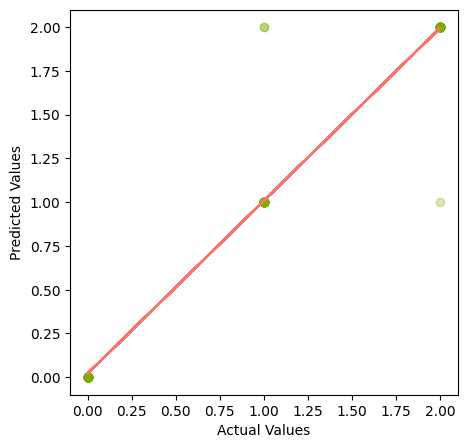

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train_encoded,y=y_lr_train_pred,c="#7CAE00",alpha=0.3)

z = np.polyfit(y_train_encoded,y_lr_train_pred,1)
p = np.poly1d(z)
plt.plot(y_train_encoded,p(y_train_encoded),"#F8766D")
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.show()